In [193]:
import pickle
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, f1_score, recall_score
import copy

In [194]:
obsGLI = None
with open('obsgli.json') as f:
    obsGLI = json.load(f)

obsGold = None
with open('obs.json') as f:
    obsGold = json.load(f)

obsGoldV2 = None
with open('obsgoldv2.json') as f:
    obsGoldV2 = json.load(f)

resGLI = None
with open('resgli.json') as f:
    resGLI = json.load(f)

resGold = None
with open('res.json') as f:
    resGold = json.load(f)

resGoldV2 = None
with open('resgoldv2.json') as f:
    resGoldV2 = json.load(f)

In [195]:
modelObsGLI = pickle.load(open('modelObsGLI.pkl', 'rb'))
modelObsGLIClassification = pickle.load(open('modelObsClassificationGLI.pkl', 'rb'))
modelResGLI = pickle.load(open('modelResGLI.pkl', 'rb'))
modelObsGold = pickle.load(open('modelObsGold.pkl', 'rb'))
modelResGold = pickle.load(open('modelResGold.pkl', 'rb'))
modelObsGoldV2 = pickle.load(open('modelObsGoldV2.pkl', 'rb'))
modelResGoldV2 = pickle.load(open('modelResGoldV2.pkl', 'rb'))

## Datasets

### Class distributions

#### Obstruction

GLI

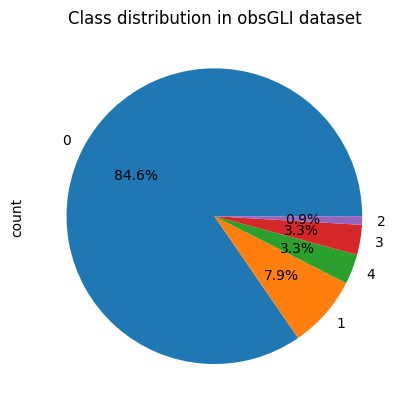

In [196]:
obsGLI_df = pd.DataFrame(obsGLI)

obsGLI_df['Obstruction'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Class distribution in obsGLI dataset')
plt.show()

GOLD

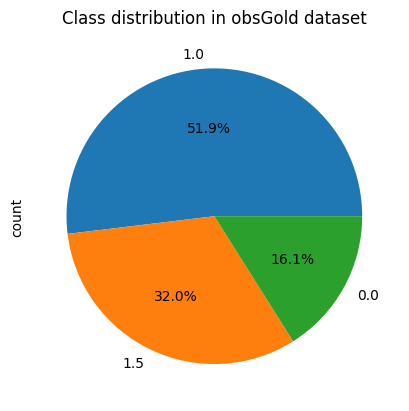

In [197]:
obsGold_df = pd.DataFrame.from_dict(obsGold, orient='index')

obsGold_df['Obstruction'] = obsGold_df.apply(lambda row: row['obstruction'], axis=1)
obsGold_df = obsGold_df.drop(columns=['obstruction'])

obsGold_df['Obstruction'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Class distribution in obsGold dataset')
plt.show()

GOLD V2

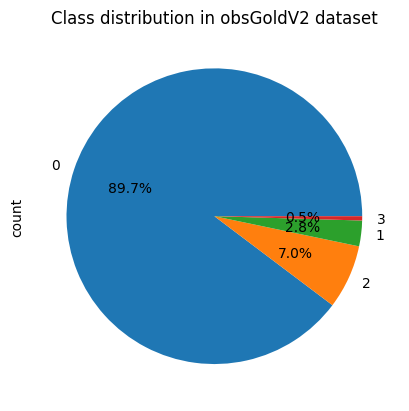

In [198]:
obsGoldV2_df = pd.DataFrame(obsGoldV2)

obsGoldV2_df['Obstruction'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Class distribution in obsGoldV2 dataset')
plt.show()

#### Restriction

GLI

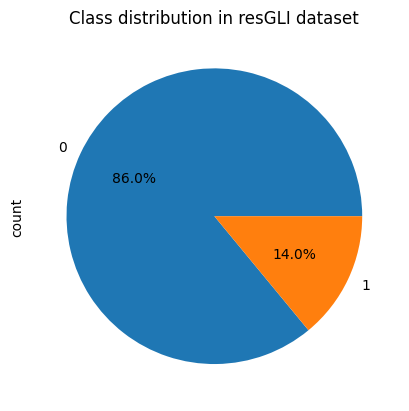

In [199]:
resGLI_df = pd.DataFrame(resGLI)

resGLI_df['Restriction'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Class distribution in resGLI dataset')
plt.show()

GOLD

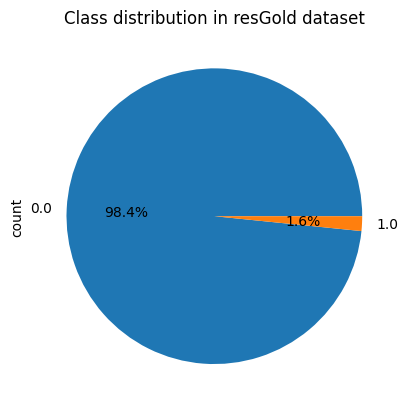

In [200]:
resGold_df = pd.DataFrame.from_dict(resGold, orient='index')

resGold_df['Restriction'] = resGold_df.apply(lambda row: row['restriction'], axis=1)
resGold_df = resGold_df.drop(columns=['restriction'])

resGold_df['Restriction'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Class distribution in resGold dataset')
plt.show()

GOLD V2

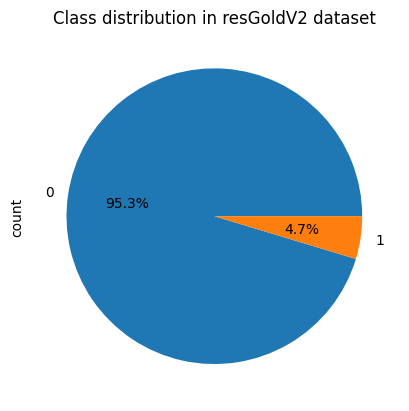

In [201]:
resGoldV2_df = pd.DataFrame(resGoldV2)

resGoldV2_df['Restriction'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Class distribution in resGoldV2 dataset')
plt.show()

## Obstruction

### GLI

##### Normal

In [202]:
obsGLICopy = copy.deepcopy(obsGLI)

xObs = []
yObs = []
for item in obsGLICopy:
    yObs.append(item['Obstruction'])
    del item['Obstruction']
    xObs.append(list(item.values()))

xObsTrain, xObsVal, yObsTrain, yObsVal = train_test_split(xObs, yObs, test_size=0.25, random_state=42)

In [203]:
print("MAE score for val:", mean_absolute_error(yObsVal, modelObsGLI.predict(pd.DataFrame(xObsVal))))
print("MAE score for train:", mean_absolute_error(yObsTrain, modelObsGLI.predict(pd.DataFrame(xObsTrain))))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
MAE score for val: 0.3094766304431552
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step
MAE score for train: 0.39487326434173153


##### Classification

In [204]:
def n_acurracy(m, dX, dY, n=1):
    l = m.predict(pd.DataFrame(dX)).tolist()
    s = 0

    for p in l:
        for i in range(len(p)):
            p[i] = (p[i], i)
        p.sort(reverse=True)

    #print(l)

    for i in range(n):
        for j in range(len(dX)):
            if dY[j] == l[j][i][1]:
                s += 1

    return s / len(dX)

def n_f1_score(model, X, y, n=1):
    # Get predictions (these are already probabilities if using softmax)
    y_prob = model.predict(pd.DataFrame(X))
    
    # Get top n predictions for each sample
    top_n_preds = []
    for prob in y_prob:
        # Get indices of top n highest probabilities
        top_n_indices = np.argsort(prob)[-n:][::-1]
        top_n_preds.append(top_n_indices)
    
    y_pred = []
    for i, preds in enumerate(top_n_preds):
        y_pred.append(y[i] if y[i] in preds else preds[0])
    
    return f1_score(y, y_pred, average='weighted')

In [205]:
obsGLICopy2 = copy.deepcopy(obsGLI)

xObs = []
yObs = []
for item in obsGLICopy2:
    yObs.append(item['Obstruction'])
    del item['Obstruction']
    xObs.append(list(item.values()))

xObsTrain, xObsVal, yObsTrain, yObsVal = train_test_split(xObs, yObs, test_size=0.25, random_state=42)

In [206]:
print("Train:")
print("Train accuracy with top 1:", n_acurracy(modelObsGLIClassification, xObsTrain, yObsTrain))
print("Train accuracy with top 2", n_acurracy(modelObsGLIClassification, xObsTrain, yObsTrain, 2))
print("Train f1 score with top 1", n_f1_score(modelObsGLIClassification, xObsTrain, yObsTrain))
print("Train f1 score with top 2", n_f1_score(modelObsGLIClassification, xObsTrain, yObsTrain, 2))

print("Val:")
print("Val accuracy with top 1:", n_acurracy(modelObsGLIClassification, xObsVal, yObsVal))
print("Val accuracy with top 2", n_acurracy(modelObsGLIClassification, xObsVal, yObsVal, 2))
print("Val f1 score with top 1", n_f1_score(modelObsGLIClassification, xObsVal, yObsVal))
print("Val f1 score with top 2", n_f1_score(modelObsGLIClassification, xObsVal, yObsVal, 2))

Train:
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
Train accuracy with top 1: 0.8875
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step
Train accuracy with top 2 0.96875
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
Train f1 score with top 1 0.8527556818181818
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
Train f1 score with top 2 0.9628078403078405
Val:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Val accuracy with top 1: 0.8703703703703703
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step
Val accuracy with top 2 0.9629629629629629
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Val f1 score with top 1 0.8591911309302614
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Val f1 score with top 2 0.9517435564219191


### Gold

In [207]:
obsGoldCopy = copy.deepcopy(obsGold)

xObs = []
yObs = []
for item in obsGoldCopy:
    yObs.append(obsGoldCopy[item]['obstruction'])
    del obsGoldCopy[item]['obstruction']
    xObs.append(list(obsGoldCopy[item].values()))

xObsTrain, xObsVal, yObsTrain, yObsVal = train_test_split(xObs, yObs, test_size=0.25, random_state=42)

In [208]:
print("MAE score val:", mean_absolute_error(yObsVal, modelObsGold.predict(pd.DataFrame(xObsVal))))
print("MAE score train:", mean_absolute_error(yObsTrain, modelObsGold.predict(pd.DataFrame(xObsTrain))))

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MAE score val: 0.7986502368515784
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
MAE score train: 0.7955585514232288


### Gold V2

In [209]:
obsGoldV2Copy = copy.deepcopy(obsGoldV2)

xObs = []
yObs = []
for item in obsGoldV2Copy:
    yObs.append(item['Obstruction'])
    del item['Obstruction']
    xObs.append(list(item.values()))

xObsTrain, xObsVal, yObsTrain, yObsVal = train_test_split(xObs, yObs, test_size=0.3, random_state=42)

In [210]:
print("MAE score for val:", mean_absolute_error(yObsVal, modelObsGoldV2.predict(pd.DataFrame(xObsVal))))
print("MAE score for train:", mean_absolute_error(yObsTrain, modelObsGoldV2.predict(pd.DataFrame(xObsTrain))))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
MAE score for val: 0.16923076923076924
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MAE score for train: 0.18791946308724833


## Restriction

### GLI

In [211]:
resGLICopy = copy.deepcopy(resGLI)

xObs = []
yObs = []
for item in resGLICopy:
    yObs.append(item['Restriction'])
    del item['Restriction']
    xObs.append(list(item.values()))

xObsTrain, xObsVal, yObsTrain, yObsVal = train_test_split(xObs, yObs, test_size=0.25, random_state=42)

0.9629629629629629
0.888888888888889
[[44  0]
 [ 2  8]]
0.93125
0.7659574468085106
[[131   9]
 [  2  18]]


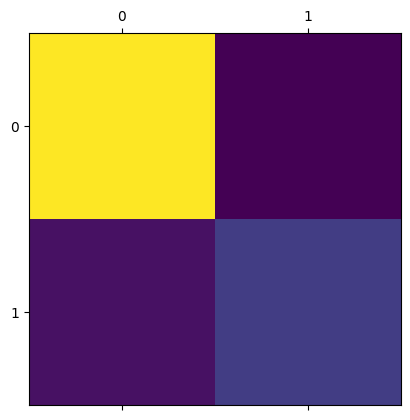

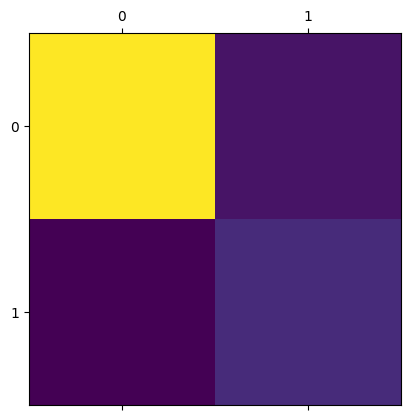

In [212]:
print(accuracy_score(yObsVal, modelResGLI.predict(pd.DataFrame(xObsVal))))
print(f1_score(yObsVal, modelResGLI.predict(pd.DataFrame(xObsVal))))
matrix = confusion_matrix(yObsVal, modelResGLI.predict(pd.DataFrame(xObsVal)))

print(matrix)
plt.matshow(matrix)

print(accuracy_score(yObsTrain, modelResGLI.predict(pd.DataFrame(xObsTrain))))
print(f1_score(yObsTrain, modelResGLI.predict(pd.DataFrame(xObsTrain))))
matrix_train = confusion_matrix(yObsTrain, modelResGLI.predict(pd.DataFrame(xObsTrain)))

print(matrix_train)
plt.matshow(matrix_train)

### Gold

In [213]:
resGoldCopy = copy.deepcopy(resGold)

xObs = []
yObs = []
for item in resGoldCopy:
    yObs.append(resGoldCopy[item]['restriction'])
    del resGoldCopy[item]['restriction']
    xObs.append(list(resGoldCopy[item].values()))

xObsTrain, xObsVal, yObsTrain, yObsVal = train_test_split(xObs, yObs, test_size=0.25, random_state=42)

0.7553516819571865
0.047619047619047616
[[245  78]
 [  2   2]]
0.6921508664627931
0.08484848484848484
[[665 299]
 [  3  14]]


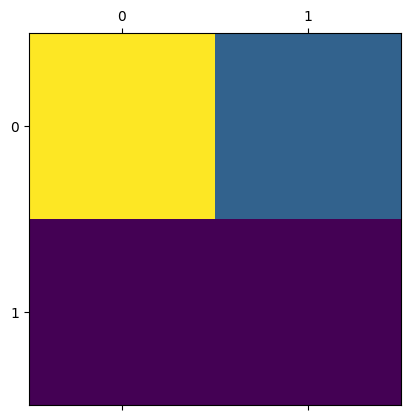

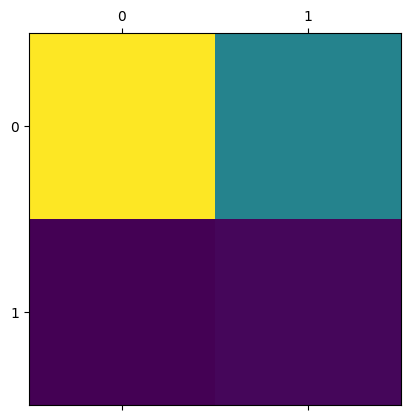

In [214]:
print(accuracy_score(yObsVal, modelResGold.predict(pd.DataFrame(xObsVal))))
print(f1_score(yObsVal, modelResGold.predict(pd.DataFrame(xObsVal))))
matrix = confusion_matrix(yObsVal, modelResGold.predict(pd.DataFrame(xObsVal)))

print(matrix)
plt.matshow(matrix)

print(accuracy_score(yObsTrain, modelResGold.predict(pd.DataFrame(xObsTrain))))
print(f1_score(yObsTrain, modelResGold.predict(pd.DataFrame(xObsTrain))))
matrix_train = confusion_matrix(yObsTrain, modelResGold.predict(pd.DataFrame(xObsTrain)))

print(matrix_train)
plt.matshow(matrix_train)

### Gold V2

In [215]:
resGoldV2Copy = copy.deepcopy(resGoldV2)

xObs = []
yObs = []
for item in resGoldV2Copy:
    yObs.append(item['Restriction'])
    del item['Restriction']
    xObs.append(list(item.values()))

xObsTrain, xObsVal, yObsTrain, yObsVal = train_test_split(xObs, yObs, test_size=0.3, random_state=42)

0.9846153846153847
0.888888888888889
[[60  0]
 [ 1  4]]
0.9798657718120806
0.7692307692307693
[[141   3]
 [  0   5]]


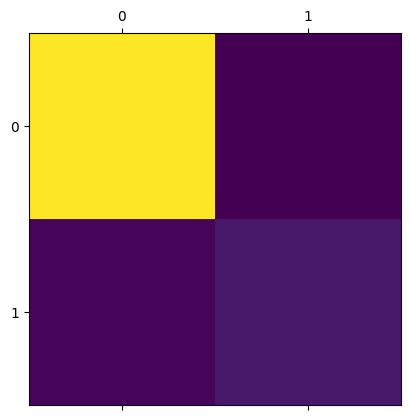

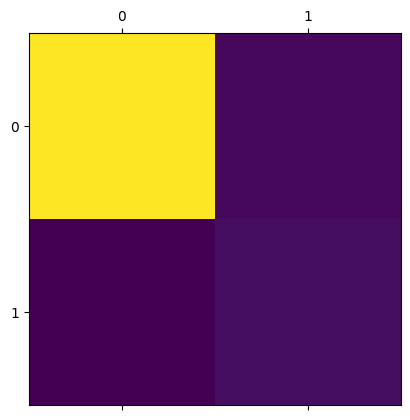

In [216]:
print(accuracy_score(yObsVal, modelResGoldV2.predict(pd.DataFrame(xObsVal))))
print(f1_score(yObsVal, modelResGoldV2.predict(pd.DataFrame(xObsVal))))
matrix = confusion_matrix(yObsVal, modelResGoldV2.predict(pd.DataFrame(xObsVal)))

print(matrix)
plt.matshow(matrix)

print(accuracy_score(yObsTrain, modelResGoldV2.predict(pd.DataFrame(xObsTrain))))
print(f1_score(yObsTrain, modelResGoldV2.predict(pd.DataFrame(xObsTrain))))
matrix_train = confusion_matrix(yObsTrain, modelResGoldV2.predict(pd.DataFrame(xObsTrain)))

print(matrix_train)
plt.matshow(matrix_train)